# Classifiers

## Laboratory 4: Data Dimension Reduction

**Team 2:**
- Chowańska Katarzyna
- Urbanek Mateusz

### 1. Generate synthetic, two-class (200 observations per class), supervised (with class labels) dataset, where:
- 5 features are discriminative (different distributions in classes)
- 45 features are not discriminative (the same distribution in both classes).

In [1]:
import numpy as np

def generate_synthetic_data(samples: int, discriminative=5, non_discriminative=45) -> np.ndarray:
  class1_ndis = np.random.normal(size=(samples, non_discriminative))
  class2_ndis = np.random.normal(size=(samples, non_discriminative))

  class1_dis = np.random.rayleigh(size=(samples, discriminative))
  class2_dis = np.random.poisson(size=(samples, discriminative))

  class1_feat = np.hstack((class1_ndis, class1_dis))
  class2_feat = np.hstack((class2_ndis, class2_dis))

  feat_join = np.vstack((class1_feat, class2_feat))

  class1_label = np.zeros(shape=samples)
  class2_label = np.ones(shape=samples)

  label_join = np.hstack((class1_label, class2_label))

  return {'features': feat_join, 'labels': label_join}

dataset = generate_synthetic_data(samples=200)

### 2. Divide the dataset randomly into training set and test set (200 data points in each).



In [2]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(dataset['features'], dataset['labels'], test_size=0.5)

### 3. Choose one method of feature selection and one method of feature extraction. Shortly describe the methods you chose (are there any assumptions, what criteria are used etc)

Feature selection method:
- `SelectKBest` - Selecting features according to the k highest scores. Takes parameter `k` - number of top features to select.

Feature extraction method:
- Principal Component Analysis (`PCA`) - Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD. Takes `n_components` parameter that defines number of components to keep.

### 4. Apply the chosen methods on the training set:
- Select/extract two best features. Visualize the training set on a 2D grouped scatterplot. Compare the results.


In [3]:
import matplotlib.pyplot as plt

FEATURES = 2

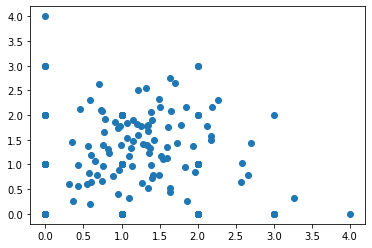

In [4]:
# selecting
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(k=FEATURES)

selected_train_x = selector.fit_transform(train_x, train_y)
selected_test_x = selector.transform(test_x)

plt.scatter(selected_train_x[:,0], selected_train_x[:,1])

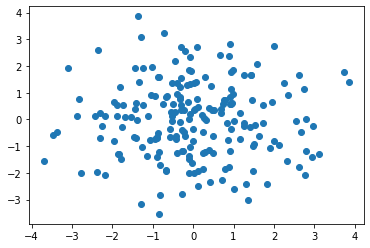

In [5]:
# extracting
from sklearn.decomposition import PCA

pca = PCA(FEATURES)

extracted_train_x = pca.fit_transform(train_x, train_y)
extracted_test_x = pca.transform(test_x)

plt.scatter(extracted_train_x[:,0], extracted_train_x[:,1])

- Train a chosen classifier based on: 
  - 3 selected features
  - 3 extracted features
  - 3 random features
  - the original dataset (without dimensionality reduction)
- Check classification accuracy using the test set. Compare the results.

In [6]:
FEATURES = 3

# from sklearn.svm import SVC
# classifier = lambda: SVC(probability=True)

# from sklearn.neural_network import MLPClassifier
# classifier = lambda: MLPClassifier

from sklearn.neighbors import KNeighborsClassifier
classifier = lambda: KNeighborsClassifier(n_neighbors=3)

In [7]:
# original dataset

classifier_original = classifier()
classifier_original.fit(train_x, train_y)

print(f'original score: {classifier_original.score(test_x, test_y)}')

original score: 0.58


In [8]:
# Selected features

selector = SelectKBest(k=FEATURES)

selected_train_x = selector.fit_transform(train_x, train_y)
selected_test_x = selector.transform(test_x)

classifier_selected = classifier()
classifier_selected.fit(selected_train_x, train_y)

print(f'selected features score: {classifier_selected.score(selected_test_x, test_y)}')

selected features score: 0.735


In [9]:
# extracted features

pca = PCA(FEATURES)

extracted_train_x = pca.fit_transform(train_x, train_y)
extracted_test_x = pca.transform(test_x)

classifier_extracted = classifier()
classifier_extracted.fit(extracted_train_x, train_y)

print(f'extracted features score: {classifier_extracted.score(extracted_test_x, test_y)}')

extracted features score: 0.49


In [10]:
# random features

random_train_x = train_x[:,np.random.randint(train_x.shape[1], size=3)]
random_test_x = test_x[:,np.random.randint(train_x.shape[1], size=3)]

classifier_random = classifier()
classifier_random.fit(random_train_x, train_y)

print(f'random score: {classifier_random.score(random_test_x, test_y)}')

random score: 0.515


- Assess the influence of feature number on classification quality. Perform classification (of the test set) on different numbers of selected and extracted features. For how many variables maximum accuracy is achieved? Which method yields better results? 

In [11]:
import pandas as pd

columns = ['number of features', 'extracted features score', 'selected features score']

results = pd.DataFrame(columns=columns)

mat = [i for i in range(1, train_x.shape[1])]

for feats in mat:
  selector = SelectKBest(k=feats)

  selected_train_x = selector.fit_transform(train_x, train_y)
  selected_test_x = selector.transform(test_x)

  classifier_selected = classifier()
  classifier_selected.fit(selected_train_x, train_y)

  pca = PCA(feats)

  extracted_train_x = pca.fit_transform(train_x, train_y)
  extracted_test_x = pca.transform(test_x)

  classifier_extracted = classifier()
  classifier_extracted.fit(extracted_train_x, train_y)

  results = results.append({columns[0]: feats, columns[1]: classifier_extracted.score(extracted_test_x, test_y), columns[2]: classifier_selected.score(selected_test_x, test_y)}, ignore_index=True)

In [12]:
print(f"average score for extraction method: {np.average(results['extracted features score'])}")
print(f"average score for selection method: {np.average(results['selected features score'])}")
print("--------\n")
print(f"best score for extraction method:\n{results.iloc[results['extracted features score'].idxmax()]}\n")
print(f"best score for selection method:\n{results.iloc[results['selected features score'].idxmax()]}\n")


average score for extraction method: 0.531734693877551
average score for selection method: 0.6274489795918368
--------

best score for extraction method:
number of features          29.000
extracted features score     0.590
selected features score      0.595
Name: 28, dtype: float64

best score for selection method:
number of features          1.000
extracted features score    0.515
selected features score     0.945
Name: 0, dtype: float64



### 5. Repeat steps 2-4 for real data. Use the thyroid cancer microarray datasets assigned during the first laboratory class.

In [73]:
# exported 'dane2.mat' file to CSV
# uczacy.D
TRAIN_X = r'https://gist.githubusercontent.com/Shanduur/dd4ab0f7442f600993bd8424f5f1debb/raw/d67493418edeaf761210bc6fe93d2adb804bd9e8/train_x.csv'
# uczacy.D
TRAIN_Y = r'https://gist.githubusercontent.com/Shanduur/dd4ab0f7442f600993bd8424f5f1debb/raw/d67493418edeaf761210bc6fe93d2adb804bd9e8/train_y.csv'
# testowy.X
TEST_X = r'https://gist.githubusercontent.com/Shanduur/dd4ab0f7442f600993bd8424f5f1debb/raw/d67493418edeaf761210bc6fe93d2adb804bd9e8/test_x.csv'
# testowy.D
TEST_Y = r'https://gist.githubusercontent.com/Shanduur/dd4ab0f7442f600993bd8424f5f1debb/raw/d67493418edeaf761210bc6fe93d2adb804bd9e8/test_y.csv'

train_x = pd.read_csv(TRAIN_X, header=None).T
train_y = np.ravel(pd.read_csv(TRAIN_Y, header=None).T)
print(train_x.shape, train_y.shape)

test_x = pd.read_csv(TEST_X, header=None).T
test_y = np.ravel(pd.read_csv(TEST_Y, header=None).T)
print(test_x.shape, test_y.shape)

(85, 300) (85,)
(40, 300) (40,)


In [74]:
FEATURES = 2

In [75]:
# selecting

selector = SelectKBest(k=FEATURES)

selected_train_x = selector.fit_transform(train_x, train_y)
selected_test_x = selector.transform(test_x)

plt.scatter(selected_train_x[:,0], selected_train_x[:,1])

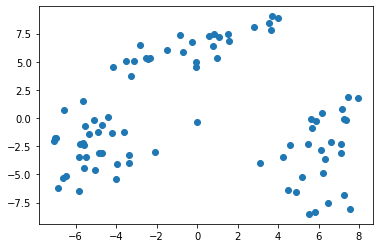

In [76]:
# extracting

pca = PCA(FEATURES)

extracted_train_x = pca.fit_transform(train_x, train_y)
extracted_test_x = pca.transform(test_x)

plt.scatter(extracted_train_x[:,0], extracted_train_x[:,1])

In [77]:
FEATURES = 3

In [78]:
# original dataset

classifier_original = classifier()
classifier_original.fit(train_x, train_y)

print(f'original score: {classifier_original.score(test_x, test_y)}')

original score: 0.975


In [80]:
# Selected features

selector = SelectKBest(k=FEATURES)

selected_train_x = selector.fit_transform(train_x, train_y)
selected_test_x = selector.transform(test_x)

classifier_selected = classifier()
classifier_selected.fit(selected_train_x, train_y)

print(f'selected features score: {classifier_selected.score(selected_test_x, test_y)}')

selected features score: 0.85


In [81]:
# extracted features

pca = PCA(FEATURES)

extracted_train_x = pca.fit_transform(train_x, train_y)
extracted_test_x = pca.transform(test_x)

classifier_extracted = classifier()
classifier_extracted.fit(extracted_train_x, train_y)

print(f'extracted features score: {classifier_extracted.score(extracted_test_x, test_y)}')

extracted features score: 0.975


In [83]:
# random features

random_train_x = train_x.iloc[:,np.random.randint(train_x.shape[1], size=3)]
random_test_x = test_x.iloc[:,np.random.randint(train_x.shape[1], size=3)]

classifier_random = classifier()
classifier_random.fit(random_train_x, train_y)

print(f'random score: {classifier_random.score(random_test_x, test_y)}')

random score: 0.5


In [90]:
columns = ['number of features', 'extracted features score', 'selected features score']

results = pd.DataFrame(columns=columns)

mat = [i for i in range(1, train_x.shape[0])]

for feats in mat:
  selector = SelectKBest(k=feats)

  selected_train_x = selector.fit_transform(train_x, train_y)
  selected_test_x = selector.transform(test_x)

  classifier_selected = classifier()
  classifier_selected.fit(selected_train_x, train_y)

  pca = PCA(feats)

  extracted_train_x = pca.fit_transform(train_x, train_y)
  extracted_test_x = pca.transform(test_x)

  classifier_extracted = classifier()
  classifier_extracted.fit(extracted_train_x, train_y)

  results = results.append({columns[0]: feats, columns[1]: classifier_extracted.score(extracted_test_x, test_y), columns[2]: classifier_selected.score(selected_test_x, test_y)}, ignore_index=True)

In [91]:
print(f"average score for extraction method: {np.average(results['extracted features score'])}")
print(f"average score for selection method: {np.average(results['selected features score'])}")
print("--------\n")
print(f"best score for extraction method:\n{results.iloc[results['extracted features score'].idxmax()]}\n")
print(f"best score for selection method:\n{results.iloc[results['selected features score'].idxmax()]}\n")

average score for extraction method: 0.9711309523809519
average score for selection method: 0.9502976190476189
--------

best score for extraction method:
number of features          2.000
extracted features score    0.975
selected features score     0.875
Name: 1, dtype: float64

best score for selection method:
number of features          25.000
extracted features score     0.975
selected features score      0.975
Name: 24, dtype: float64

